In [1]:
import pandas as pd
import openpyxl
import numpy as np

In [2]:
df_Rosario= pd.read_excel('./Rosario F.xlsx')

Debera catacterizar el voto utilizando los datos de la muestra y cualquier otra fuente secundaria que considere. Debera subir el codigo utilizado al repositorio y preprar un informe con los descubrimientos mas relevantes.
1. Porcentaje de voto por edad y por genero
2. Datos de georreferenciación
3. Dos regresiones: 1 con edad y 1 con genero.
4. Cruzar voto por radio. 

In [3]:
df_Rosario.shape


(372, 8)

In [4]:
df_Rosario.dtypes


interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                      int64
dtype: object

In [5]:
df_Rosario.head

<bound method NDFrame.head of     interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO  
0    Ma

In [8]:
# Asegurarse de que la columna es string (por si hay problemas en el formato)
df_Rosario['INT DE VOTO X ESPACIO'] = df_Rosario['INT DE VOTO X ESPACIO'].astype(str)

# Calcular las frecuencias de cada categoría
frecuencias = df_Rosario['INT DE VOTO X ESPACIO'].value_counts()

# Calcular el porcentaje de cada categoría
porcentajes = (frecuencias / frecuencias.sum()) * 100

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Categoría': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje': porcentajes.values
})

# Mostrar los resultados
print(resultados)


        Categoría  Frecuencia  Porcentaje
0             JxC          90   24.193548
1             FdT          80   21.505376
2  NINGUNO/NOSABE          72   19.354839
3     LIBERTARIOS          57   15.322581
4           OTROS          35    9.408602
5             PNK          26    6.989247
6             FIT          12    3.225806


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

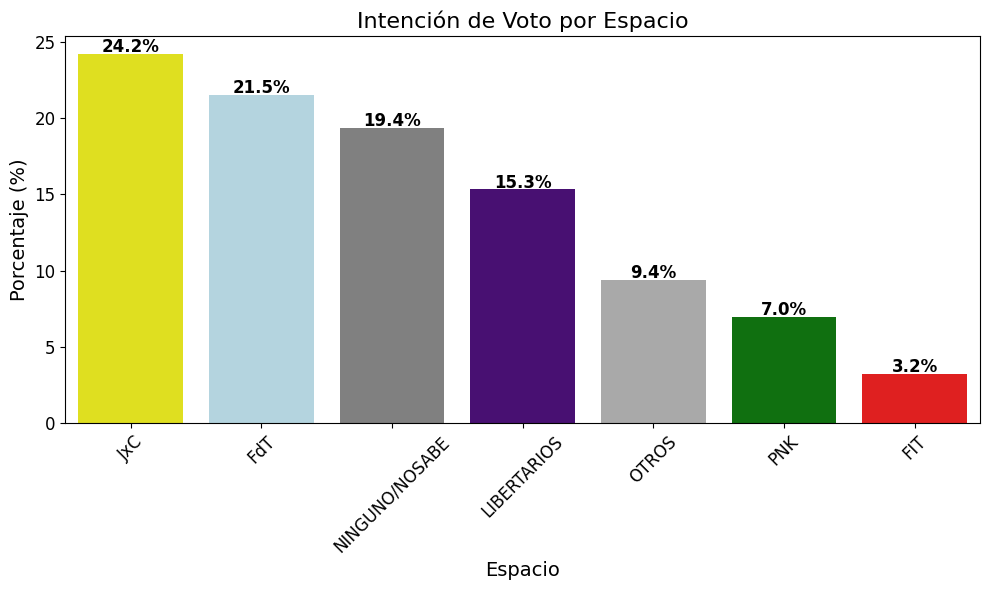

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de colores
colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}

# Asignar los colores correctamente a cada categoría
resultados['Color'] = resultados['Categoría'].map(colores)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=resultados, x='Categoría', y='Porcentaje', 
                 hue='Categoría', palette=colores)

# Agregar los porcentajes sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato con un decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')  # Desplazar un poco el texto hacia arriba

# Agregar títulos y etiquetas
plt.title('Intención de Voto por Espacio', fontsize=16)
plt.xlabel('Espacio', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)

# Rotar etiquetas del eje X para que se vean mejor
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()

In [11]:
# Crear la tabla cruzada
tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['EDAD'])

# Calcular los porcentajes por columna
tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100

# Guardar el resultado en un nuevo DataFrame
df_porcentajes = tabla_cruzada_porcentaje_columna.copy()

# Mostrar la nueva tabla de porcentajes
print(df_porcentajes)

# Ahora puedes usar df_porcentajes para el gráfico

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [12]:
df_porcentajes.dtypes


EDAD
16 a 25     float64
26 a 35     float64
36 a 45     float64
46 a 55     float64
56 y mas    float64
dtype: object

In [13]:
print(df_porcentajes.columns)


Index(['16 a 25', '26 a 35', '36 a 45', '46 a 55', '56 y mas'], dtype='object', name='EDAD')


In [14]:
print(df_porcentajes)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [15]:
# Diccionario de colores
colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}

# Reshape the data into a long format for plotting
df_larga = df_porcentajes.melt(id_vars='INT DE VOTO X ESPACIO', 
                               var_name='EDAD', 
                               value_name='Porcentaje')


# Crear el gráfico de barras apiladas
plt.figure(figsize=(18, 11))

# Usar seaborn para el gráfico apilado
sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)

# Añadir los porcentajes encima de las barras sin decimales
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Añadir porcentaje solo si la altura de la barra es mayor que 0
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)


# Personalizar el gráfico
plt.title('Porcentaje de votos por edad y espacio político')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Espacio Político', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['INT DE VOTO X ESPACIO']"

In [ ]:
# Crear la tabla cruzada
tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['GENERO'])

# Calcular los porcentajes por columna
tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100

# Guardar el resultado en un nuevo DataFrame
df_porcentajes2 = tabla_cruzada_porcentaje_columna.copy()

# Mostrar la nueva tabla de porcentajes
print(df_porcentajes2)

# Ahora puedes usar df_porcentajes para el gráfico

GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                     3.030303   2.525253  22.222222
FdT                    21.212121  22.727273   0.000000
JxC                    25.454545  24.242424   0.000000
LIBERTARIOS             6.666667  22.222222  22.222222
NINGUNO/NOSABE         24.242424  14.141414  44.444444
OTROS                  11.515152   7.575758  11.111111
PNK                     7.878788   6.565657   0.000000


In [ ]:
# Resetear el índice para que 'INT DE VOTO X ESPACIO' sea una columna
df_porcentajes2.reset_index(inplace=True)

# Convertir el DataFrame al formato largo
df_larga2 = df_porcentajes2.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='GENERO', 
                                 value_name='Porcentaje')

# Verificar la estructura del DataFrame transformado
print(df_larga2.head())


  INT DE VOTO X ESPACIO    GENERO  Porcentaje
0                   FIT  Femenino    3.030303
1                   FdT  Femenino   21.212121
2                   JxC  Femenino   25.454545
3           LIBERTARIOS  Femenino    6.666667
4        NINGUNO/NOSABE  Femenino   24.242424


In [ ]:
print(df_porcentajes2.columns)


Index(['INT DE VOTO X ESPACIO', 'Femenino', 'Masculino', 'Otro'], dtype='object', name='GENERO')


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_26918/2936819901.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO',
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions

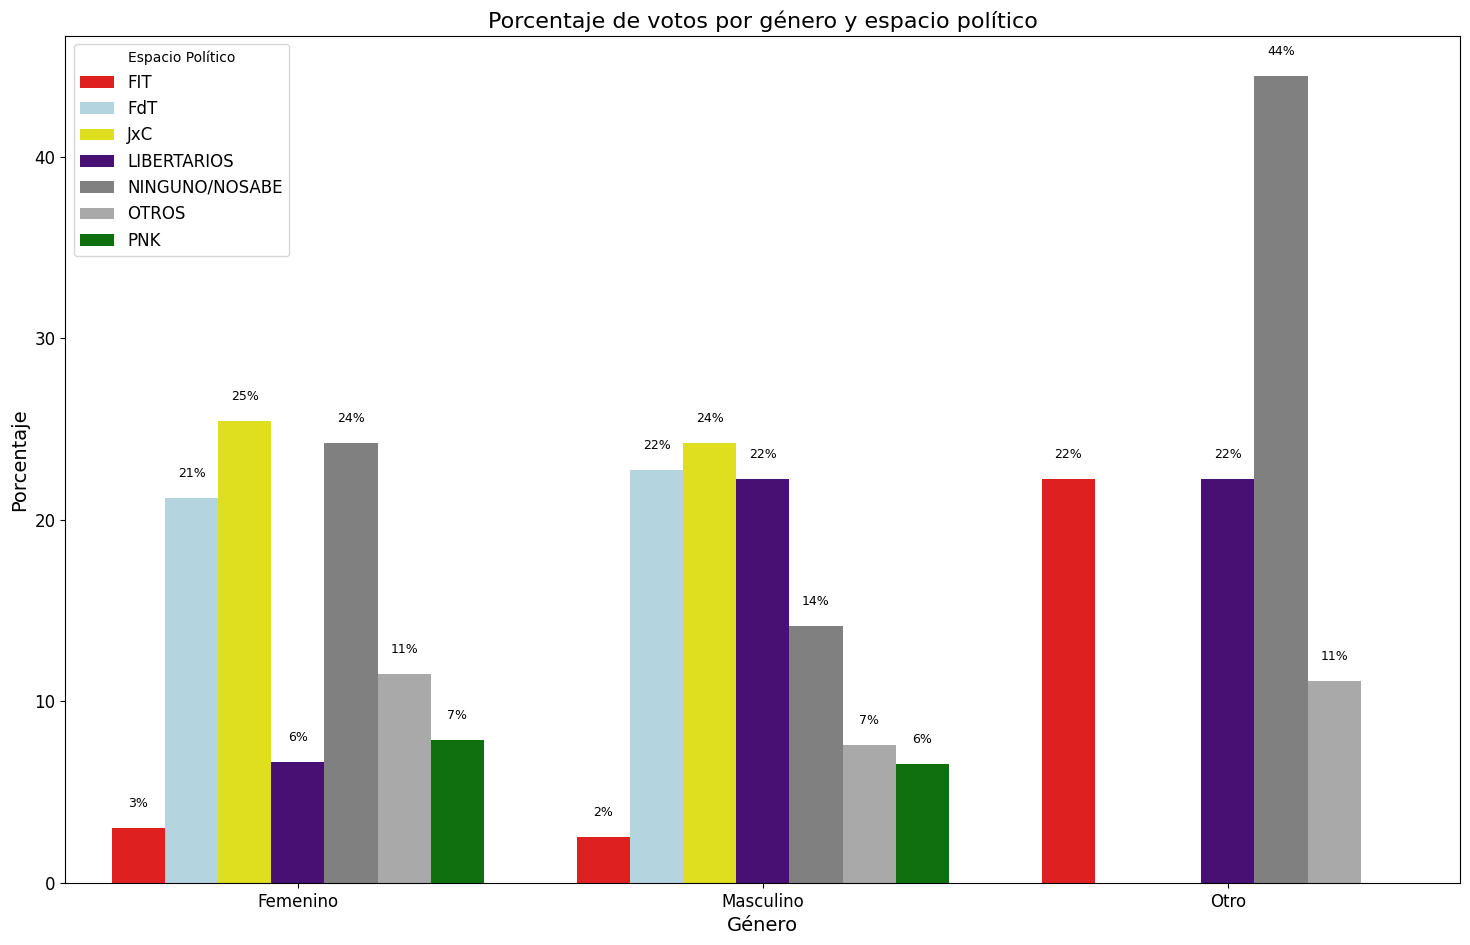

In [ ]:
# Asegurar que las columnas esperadas estén presentes
df_larga2 = df_larga2[['GENERO', 'INT DE VOTO X ESPACIO', 'Porcentaje']]

# Restablecer el índice completamente
df_larga2.reset_index(drop=True, inplace=True)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(18, 11))

# Usar seaborn para el gráfico apilado
sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)

# Añadir los porcentajes encima de las barras sin decimales
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Añadir porcentaje solo si la altura de la barra es mayor que 0
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)

# Personalizar el gráfico
plt.title('Porcentaje de votos por género y espacio político', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Espacio Político', loc='upper left', fontsize=12)


In [16]:
valores_INTNVOTO = df_Rosario ['INT DE VOTO X ESPACIO'].unique() 
valores_EDAD = df_Rosario ['EDAD'].unique()

print("Valores únicos en INTENCIÓN DE VOTO:", valores_INTNVOTO) 
print("Valores únicos en EDAD:", valores_EDAD)

Valores únicos en INTENCIÓN DE VOTO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']
Valores únicos en EDAD: ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']


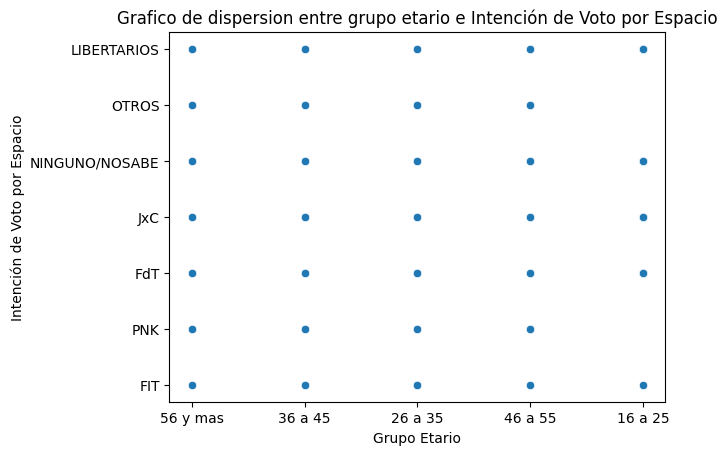

In [18]:
sns.scatterplot(x='EDAD', y='INT DE VOTO X ESPACIO', data=df_Rosario)

plt.title('Grafico de dispersion entre grupo etario e Intención de Voto por Espacio')
plt.xlabel('Grupo Etario')
plt.ylabel('Intención de Voto por Espacio')
plt.show()

In [21]:
# Crear un diccionario para la conversión
mapa_edad = {
    '16 a 25': 1,
    '26 a 35': 2,
    '36 a 45': 3,
    '46 a 55': 4,
    '56 y mas': 5
}

# Convertir EDAD a numérica
df_Rosario['EDAD_NUM'] = df_Rosario['EDAD'].map(mapa_edad)


In [22]:
# Aplicar one-hot encoding a la columna INT DE VOTO X ESPACIO
df_Rosario = pd.get_dummies(df_Rosario, columns=['INT DE VOTO X ESPACIO'], prefix='VOTO', drop_first=True)


In [23]:
print(df_Rosario.head())


  interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0    56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1    67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2    24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3    84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4    21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   

      GENERO      RADIO  EDAD_NUM  VOTO_FdT  VOTO_JxC  VOTO_LIBERTARIOS  \
0  Masculino  820840409         5     False     False              True   
1  Masculino  820840410         3     False     False             False   
2   Femenino  820840502         5     False     False             False   
3  Masculino  820840502         2     False     False              True   
4   Femenino  820841013         3     False     False             False   

   VOTO_NINGUNO/NOSABE  VOTO_OTROS  VOTO_PNK  
0                False       False     False  
1         

In [19]:
correlacion_pearson = df_Rosario["EDAD_NUM"].corr(df_Rosario['INT DE VOTO X ESPACIO'])
print("La correlación de Pearson entre Importancia de los partidos y Confianza en los partidos es:", correlacion_pearson)

ValueError: could not convert string to float: '56 y mas'